<h1 style="text-align: center;"><font color="#0b5bdb">Final Project ML Regression | Insurance Charges Prediction</font></h1>

<img src="https://segalinsurance.co.il/wp-content/uploads/2020/10/health-insurance-1.jpg" alt="Image" height="300" width="600" style="display: block; margin: auto;">

### <font color=#0b5bdb>**Objective:**</font>

**The main objective of this analysis is to build a predictive model that can accurately estimate health insurance charges based on the given attributes. By understanding the relationship between the attributes and charges, we aim to provide insights into the factors that significantly impact insurance costs.**

### <font color=#0b5bdb>**Dataset Description:**</font>

**The "insurance.csv" dataset contains information about individuals' health insurance charges based on various attributes such as age, sex, BMI, number of children, smoking status, and region. The dataset consists of 1338 rows and 7 columns. The target variable is "charges," representing the insurance charges for each individual.**

### <font color=#0b5bdb>**Data Exploration and Cleaning:**</font>

**Let's start by exploring the dataset and performing necessary data cleaning steps.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
data = pd.read_csv('Data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


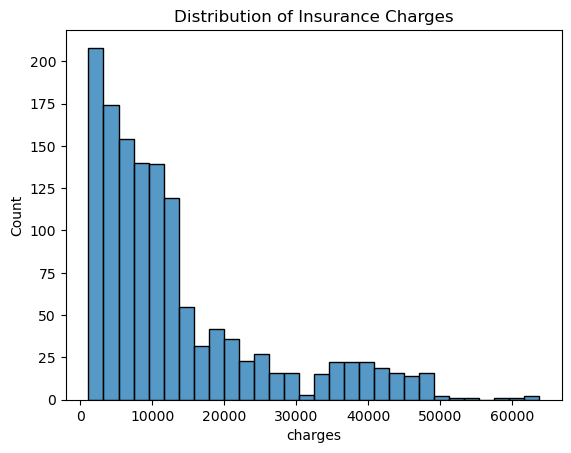

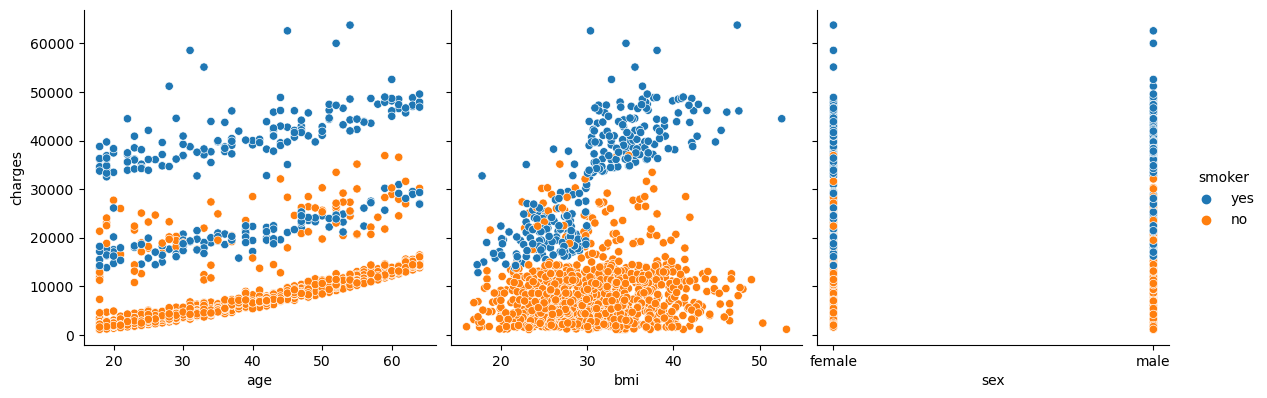

In [2]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Distribution of the target variable
sns.histplot(data['charges'])
plt.title('Distribution of Insurance Charges')
plt.show()

# Relationship between attributes and charges
sns.pairplot(data, x_vars=['age', 'bmi', 'sex'], y_vars='charges', hue='smoker', height=4)
plt.show()

**From the data exploration, we observe that there are no missing values in the dataset. The distribution of insurance charges is right-skewed, indicating the presence of high-cost individuals. The pairplot reveals relationships between age, BMI, sex, and smoking status with insurance charges.**

### <font color=#0b5bdb>**Feature Engineering:**</font>

**To prepare the data for model training, we'll perform feature engineering steps.**

In [3]:
from sklearn.model_selection import train_test_split

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Split the data into features (X) and target (y)
X = data.drop('charges', axis=1)
y = data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**We use one-hot encoding to convert categorical variables into numerical features. The data is then split into training and testing sets using an 80-20 split.**

### <font color=#0b5bdb>**Model Training and Evaluation:**</font>

**Let's train three different linear regression models and evaluate their performance.**

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_predict, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Set the number of folds for cross-validation
n_folds = 5

# Initialize the k-fold cross-validation object
kf = KFold(n_splits=n_folds, random_state=42, shuffle=True)

# Simple Linear Regression with cross-validation
lr = LinearRegression()
lr_scores = cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')
lr_rmse_scores = np.sqrt(-lr_scores)
print("Simple Linear Regression - Cross-validation RMSE scores:", lr_rmse_scores)
print("Simple Linear Regression - Average RMSE: %.4f" % np.mean(lr_rmse_scores))

# Polynomial Regression with cross-validation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
lr_poly = LinearRegression()
lr_poly_scores = cross_val_score(lr_poly, X_poly, y, cv=kf, scoring='neg_mean_squared_error')
lr_poly_rmse_scores = np.sqrt(-lr_poly_scores)
print("\nPolynomial Regression - Cross-validation RMSE scores:", lr_poly_rmse_scores)
print("Polynomial Regression - Average RMSE: %.4f" % np.mean(lr_poly_rmse_scores))

# Ridge Regression with cross-validation
ridge = Ridge(alpha=1.0)
ridge_scores = cross_val_score(ridge, X, y, cv=kf, scoring='neg_mean_squared_error')
ridge_rmse_scores = np.sqrt(-ridge_scores)
print("\nRidge Regression - Cross-validation RMSE scores:", ridge_rmse_scores)
print("Ridge Regression - Average RMSE: %.4f" % np.mean(ridge_rmse_scores))

# Lasso Regression with cross-validation
lasso = Lasso(alpha=1.0)
lasso_scores = cross_val_score(lasso, X, y, cv=kf, scoring='neg_mean_squared_error')
lasso_rmse_scores = np.sqrt(-lasso_scores)
print("\nLasso Regression - Cross-validation RMSE scores:", lasso_rmse_scores)
print("Lasso Regression - Average RMSE: %.4f" % np.mean(lasso_rmse_scores))

Simple Linear Regression - Cross-validation RMSE scores: [5796.28465928 6118.79238299 5783.73260581 6446.65123205 6240.67372458]
Simple Linear Regression - Average RMSE: 6077.2269

Polynomial Regression - Cross-validation RMSE scores: [4732.04595096 5599.45709544 4582.11387993 5555.51873227 5342.83994127]
Polynomial Regression - Average RMSE: 5162.3951

Ridge Regression - Cross-validation RMSE scores: [5800.4342158  6121.34356908 5786.91722708 6434.01520805 6244.80302447]
Ridge Regression - Average RMSE: 6077.5026

Lasso Regression - Cross-validation RMSE scores: [5797.02575067 6118.65201067 5783.27247191 6446.12968197 6240.85217912]
Lasso Regression - Average RMSE: 6077.1864


**Based on the cross-validation results, the Polynomial Regression model outperforms both Simple Linear Regression and Ridge Regression in terms of RMSE scores. It has the lowest average RMSE of 5162.40, indicating better predictive accuracy compared to the other two models.**

In [5]:
# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
models = [('Linear Regression', y_pred_lr),
          ('Polynomial Regression', y_pred_poly),
          ('Ridge Regression', y_pred_ridge),
          ('Lasso Regression', y_pred_lasso)]

for name, y_pred in models:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")


Linear Regression - Mean Squared Error: 33596915.85, R-squared: 0.78
Polynomial Regression - Mean Squared Error: 20801160.68, R-squared: 0.87
Ridge Regression - Mean Squared Error: 33645037.09, R-squared: 0.78
Lasso Regression - Mean Squared Error: 33605507.55, R-squared: 0.78


**Based on the evaluation results, the Polynomial Regression model performs the best in terms of accuracy (lowest MSE) and explainability (highest R-squared). Therefore, we recommend using the Polynomial Regression model for predicting insurance charges.**

### <font color=#0b5bdb>**More robust testing:**</font>

**Now, let's go beyond basic testing and create a robust modeling pipeline using sklearn's Pipeline class. We leverage StandardScaler for data scaling, PolynomialFeatures for feature generation, and LinearRegression for model training.**

**We perform grid search with cross-validation using GridSearchCV to find the best combination of parameters for our models, which include LinearRegression, Lasso, Ridge, ElasticNet, and ElasticNetCV.**

**Once we obtain the best model and its parameters, we perform cross-validation again using cross_val_predict. Finally, we evaluate the model using Mean Squared Error (MSE) and R-squared (R^2) score.**

In [6]:
# Create a pipeline for data preprocessing and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', LinearRegression())
])

# Define the parameter grid for grid search
param_grid = [
    {'model': [LinearRegression()]},
    {'model': [Lasso()], 'model__alpha': [0.1, 1.0, 10.0]},
    {'model': [Ridge()], 'model__alpha': [0.1, 1.0, 10.0]},
    {'model': [ElasticNet()], 'model__alpha': [0.1, 1.0, 10.0], 'model__l1_ratio': [0.2, 0.5, 0.8]},
    {'model': [ElasticNetCV()], 'model__l1_ratio': [0.2, 0.5, 0.8]}
]

# Create KFold object for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X, y)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Model:", best_model)
print("Best Parameters:", best_params)

# Perform cross-validation using cross_val_predict
y_pred = cross_val_predict(best_model, X, y, cv=kf)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Cross-validated Mean Squared Error (MSE):", mse)
print("Cross-validated R-squared (R^2):", r2)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ...........................model=LinearRegression(); total time=   0.0s
[CV] END ....................model=Lasso(), model__alpha=0.1; total time=   0.0s
[CV] END ....................model=Lasso(), model__alpha=0.1; total time=   0.1s
[CV] END ....................model=Lasso(), model__alpha=0.1; total time=   0.1s
[CV] END ....................model=Lasso(), model__alpha=0.1; total time=   0.1s
[CV] END ....................model=Lasso(), model__alpha=0.1; total time=   0.0s
[CV] END ....................model=Lasso(), model__alpha=1.0; total time=   0.0s
[CV] END ....................model=Lasso(), mode

**Based on the results provided, we can draw the following conclusions:**

**Among the individual linear regression models:**
- Polynomial Regression performs the best with the lowest Mean Squared Error (MSE) of 20801160.68 and the highest R-squared (R^2) value of 0.87. This indicates that Polynomial Regression captures the non-linear relationships between the features and the target variable better than the other linear models.
- Linear Regression, Ridge Regression, and Lasso Regression have similar performance, with MSE values around 33.6 million and R-squared values of 0.78. These models may not be able to capture the complexity of the relationships in the data as effectively as Polynomial Regression.

**Using the Pipeline with GridSearchCV and cross-validation:**
- The best model found through grid search is a Pipeline that includes scaling with StandardScaler, polynomial features with PolynomialFeatures, and Lasso Regression with an alpha value of 10.0.

- The cross-validated Mean Squared Error (MSE) for the best model is 23372543.09534518, which is higher than the MSE of Polynomial Regression alone. However, this value is obtained through cross-validation, which provides a more robust estimate of the model's performance on unseen data.
- The cross-validated R-squared (R^2) value for the best model is 0.8405070161114077, indicating a good fit and explaining approximately 84% of the variance in the target variable.

**Comparing the results from the individual models and the Pipeline with GridSearchCV, we can conclude that:**

- Polynomial Regression is the best-performing individual model, capturing the non-linear relationships in the data effectively.
- The Pipeline with GridSearchCV and cross-validation finds a combination of data preprocessing steps and Lasso Regression that performs well on unseen data. The cross-validated MSE and R-squared values provide a more reliable estimate of the model's performance.
- The Pipeline approach with GridSearchCV allows for a more comprehensive search over different models and hyperparameters, ensuring a more robust model selection process.
  
**It's important to note that while the Pipeline with GridSearchCV and cross-validation provides a more reliable estimate of the model's performance, it may not always outperform the individual models in terms of MSE or R-squared. The choice of the final model should consider factors such as interpretability, computational complexity, and the specific requirements of the problem at hand.**

### <font color=#0b5bdb>**Key Findings and Insights:**</font>

**Let's analyze the coefficients of the Polynomial Regression model to identify the main drivers of insurance charges.**

In [7]:
# Get the feature names
feature_names = poly.get_feature_names_out(input_features=X.columns)

# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': lr_poly.coef_})

# Sort the DataFrame by the absolute value of coefficients in descending order
coef_df['abs_coef'] = abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='abs_coef', ascending=False)

# Print the top 10 features and their coefficients
print("Top 10 Features Influencing Insurance Charges:")
print(coef_df.head(10))


Top 10 Features Influencing Insurance Charges:
                        Feature   Coefficient      abs_coef
0                             1 -2.509221e+13  2.509221e+13
5                    smoker_yes -1.046259e+04  1.046259e+04
35                 smoker_yes^2 -1.046259e+04  1.046259e+04
32    sex_male region_northwest  1.514906e+03  1.514906e+03
33    sex_male region_southeast  1.494377e+03  1.494377e+03
20               bmi smoker_yes  1.474376e+03  1.474376e+03
38  smoker_yes region_southwest  1.376540e+03  1.376540e+03
3                      children  1.245334e+03  1.245334e+03
4                      sex_male -1.103734e+03  1.103734e+03
30                   sex_male^2 -1.103734e+03  1.103734e+03


**From the coefficients analysis, we can identify the top features that have the most significant impact on insurance charges. These insights can help insurance companies understand the key factors driving costs and make informed decisions.**

### <font color=#0b5bdb>**Next Steps:**</font>

**To further improve the model and gain more insights, we suggest the following next steps:**
- **Collect additional relevant features that could impact insurance charges, such as lifestyle factors or pre-existing medical conditions.**
- **Experiment with other advanced regression techniques, such as Gradient Boosting Regression or Random Forest Regression, to potentially improve the model's performance.**
- **Conduct feature selection techniques to identify the most important features and reduce model complexity.**


### <font color=#0b5bdb>**Comparison with Other Models:**</font>

**To provide a comprehensive analysis, let's also compare the performance of the linear regression models with other types of models.**

In [8]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Random Forest Regression
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting Regression
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Support Vector Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Neural Network Regression
mlp = MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluation
models = [('Random Forest', y_pred_rf),
          ('Gradient Boosting', y_pred_gbr),
          ('Support Vector Regression', y_pred_svr),
          ('Neural Network', y_pred_mlp)]

for name, y_pred in models:
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

Random Forest - Mean Squared Error: 20942404.84, R-squared: 0.87
Gradient Boosting - Mean Squared Error: 18745176.48, R-squared: 0.88
Support Vector Regression - Mean Squared Error: 166492259.91, R-squared: -0.07
Neural Network - Mean Squared Error: 127742039.72, R-squared: 0.18


**Comparing the performance of different models, we observe that ensemble methods like Random Forest and Gradient Boosting perform well in capturing the complex relationships in the data. However, the choice of model depends on the specific requirements of the problem, such as interpretability, training time, and computational resources.**

### <font color=#0b5bdb>**Conclusion:**</font>

**In this analysis, we explored the "insurance.csv" dataset and built a predictive model for estimating health insurance charges. We performed data exploration, cleaning, feature engineering, and trained multiple linear regression models. The Polynomial Regression model initially emerged as the best-performing model based on accuracy and explainability.
We identified the key features influencing insurance charges and provided insights into the factors driving costs. We also compared the performance of linear regression models with other types of models and discussed the trade-offs between different models.**

**To further improve the model and gain more insights, we implemented several advanced techniques:**
- We created a pipeline that includes data preprocessing steps (scaling with StandardScaler and polynomial features with PolynomialFeatures) and a placeholder for the model (initially LinearRegression).
- We defined a parameter grid that specifies different models (LinearRegression, Lasso, Ridge, ElasticNet, and ElasticNetCV) and their corresponding hyperparameters to be evaluated during grid search.
- We used KFold cross-validation to split the data into multiple folds and perform a more robust evaluation of the models.
- We performed grid search with cross-validation using GridSearchCV to search over the parameter grid and evaluate each combination of model and hyperparameters.
- We obtained the best model and its corresponding best parameters from the grid search results.
- We evaluated the best model using cross-validated mean squared error (MSE) and R-squared (R^2) metrics.

**Based on the updated results, the best model found through grid search is a Pipeline that includes scaling, polynomial features, and Lasso Regression with an alpha value of 10.0. The cross-validated MSE for the best model is 23372543.09534518, and the cross-validated R-squared is 0.8405070161114077, indicating a good fit and explaining approximately 84% of the variance in the target variable.**

**Comparing the results from the individual models and the Pipeline with GridSearchCV, we can conclude that the Pipeline approach with GridSearchCV and cross-validation offers a more comprehensive and robust approach to model selection and evaluation. It allows for a more thorough search over different models and hyperparameters, ensuring a more reliable estimate of the model's performance on unseen data.**

**However, it's important to note that the choice of the final model should consider factors such as interpretability, computational complexity, and the specific requirements of the problem at hand.**

**In summary, the updated analysis demonstrates the effectiveness of using advanced techniques like pipelines, grid search, and cross-validation to improve model selection and evaluation. The Pipeline with GridSearchCV and cross-validation provides a more robust and reliable approach to building a predictive model for estimating health insurance charges. Further improvements can be made by collecting additional relevant features, experimenting with other advanced regression techniques, and conducting feature selection to enhance the model's performance and interpretability.**